<a href="https://colab.research.google.com/github/ktcraig/Project-1-AI-Class/blob/Demo-Branch/Money_Miners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install all required libraries**

In [400]:
# Install the required libraries
!pip install prophet

In [401]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet
from matplotlib import pyplot as plt
import gdown
%matplotlib inline


# **Import all data collected for stocks**

In [402]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [403]:
#URL for downloading bitcoin data
url_bitcoin = 'https://drive.google.com/uc?id=1g_bLlJpB0B9TkPEnTwCmeGlhZVqTOZ5L'
gdown.download(url_bitcoin, 'Bitcoin_Data.csv', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1g_bLlJpB0B9TkPEnTwCmeGlhZVqTOZ5L
To: /content/Bitcoin_Data.csv
100%|██████████| 161k/161k [00:00<00:00, 65.3MB/s]


'Bitcoin_Data.csv'

In [404]:
#URL for downloading for SP500 data
url_sp500 = 'https://drive.google.com/uc?id=1kL74LliyVXjr8UiwH7Wa6Td6Z4HLhY9i'
gdown.download(url_sp500, 'SP500_Data.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1kL74LliyVXjr8UiwH7Wa6Td6Z4HLhY9i
To: /content/SP500_Data.csv
100%|██████████| 111k/111k [00:00<00:00, 69.9MB/s]


'SP500_Data.csv'

In [405]:
#URL for downloading for gold data
url_gold = 'https://drive.google.com/uc?id=1Xn0QmR6paT0pxeX7UEiwb_Y6NvP23N0Q'
gdown.download(url_gold, 'Gold_Data.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Xn0QmR6paT0pxeX7UEiwb_Y6NvP23N0Q
To: /content/Gold_Data.csv
100%|██████████| 114k/114k [00:00<00:00, 50.7MB/s]


'Gold_Data.csv'

# **Read into dataframes**

In [406]:
#Read the URL_Bitcoin into a dataframe
bitcoin_df = pd.read_csv(url_bitcoin,
                 index_col="Date",
                 parse_dates=True
                )

# Drop any values that are blank
bitcoin_df = bitcoin_df.dropna()

# Drop Column '% Change'
bitcoin_df = bitcoin_df.drop(columns="Change %")

# Preview the dataset
bitcoin_df.head()

,Price,Open,High,Low,Vol.
Date,,,,,
2024-12-09,"97,359.4","101,129.7","101,198.6","94,395.8",321.01K
2024-12-08,"101,115.8","99,837.0","101,339.9","98,713.9",128.93K
2024-12-07,"99,837.0","99,757.2","100,441.8","98,969.0",118.44K
2024-12-06,"99,760.7","96,968.9","101,908.5","96,452.0",213.49K
2024-12-05,"96,970.8","98,624.8","103,719.4","92,510.4",245.79K


In [407]:
#Read the URL_SP500 into a dataframe
sp500_df = pd.read_csv(url_sp500,
                 index_col="Date",
                 parse_dates=True
                )

# Drop any values that are blank
sp500_df = sp500_df.dropna()

# Preview the dataset
sp500_df.head()
sp500_df.tail()

,Close/Last,Open,High,Low
Date,,,,
2014-12-19,2070.65,2061.04,2077.85,2061.03
2014-12-18,2061.23,2018.98,2061.23,2018.98
2014-12-17,2012.89,1973.77,2016.75,1973.77
2014-12-16,1972.74,1986.71,2016.89,1972.56
2014-12-15,1989.63,2005.03,2018.69,1982.26


In [408]:
# Read the URL_GOLD, with the first column as row index.

gold_df = pd.read_csv(url_gold,
                 index_col="Date",
                 parse_dates=True
                )

# Drop any values that are blank.

gold_df = gold_df.dropna()

# Preview the dataset.

gold_df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2024-12-12,"2,748.30","2,753.51","2,760.91","2,743.49",1.62K,-0.30%
2024-12-11,"2,756.70","2,721.20","2,759.70","2,719.10",264.99K,1.41%
2024-12-10,"2,718.40","2,684.40","2,721.70","2,680.70",181.51K,1.21%
2024-12-09,"2,685.80","2,665.00","2,700.00","2,649.70",182.15K,0.99%
2024-12-06,"2,659.60","2,655.00","2,667.90","2,635.60",167.17K,0.42%


# **Clean the data by columns and formatting the data within them**

In [409]:
# For Bitcoin_df, clean the columns of the data
bitcoin_df.columns = ["Price", "Open", "High", "Low", "Volume"]
bitcoin_df.head()

,Price,Open,High,Low,Volume
Date,,,,,
2024-12-09,"97,359.4","101,129.7","101,198.6","94,395.8",321.01K
2024-12-08,"101,115.8","99,837.0","101,339.9","98,713.9",128.93K
2024-12-07,"99,837.0","99,757.2","100,441.8","98,969.0",118.44K
2024-12-06,"99,760.7","96,968.9","101,908.5","96,452.0",213.49K
2024-12-05,"96,970.8","98,624.8","103,719.4","92,510.4",245.79K


In [410]:
# For SP500_df, clean the columns of the SP500data
sp500_df.columns = ["Price", "Open", "High", "Low"]
sp500_df.head(5)

,Price,Open,High,Low
Date,,,,
2024-12-13,6051.09,6068.17,6078.58,6035.77
2024-12-12,6051.25,6074.29,6079.68,6051.25
2024-12-11,6084.19,6060.15,6092.59,6060.15
2024-12-10,6034.91,6057.59,6065.40,6029.89
2024-12-09,6052.85,6083.01,6088.51,6048.63


In [411]:
# For Gold_Df, clean the columns of the data
gold_df.columns = ["Price", "Open", "High", "Low", "Volume", "Change %"]
gold_df =  gold_df.drop(columns="Volume")
gold_df.head()

,Price,Open,High,Low,Change %
Date,,,,,
2024-12-12,"2,748.30","2,753.51","2,760.91","2,743.49",-0.30%
2024-12-11,"2,756.70","2,721.20","2,759.70","2,719.10",1.41%
2024-12-10,"2,718.40","2,684.40","2,721.70","2,680.70",1.21%
2024-12-09,"2,685.80","2,665.00","2,700.00","2,649.70",0.99%
2024-12-06,"2,659.60","2,655.00","2,667.90","2,635.60",0.42%


In [412]:
# For Bitcoin_df, Convert the Price column to numeric and ignore the comma
bitcoin_df['Price'] = bitcoin_df['Price'].str.replace(',', '').astype(float)
bitcoin_df['Open'] = bitcoin_df['Open'].str.replace(',', '').astype(float)
bitcoin_df['High'] = bitcoin_df['High'].str.replace(',', '').astype(float)
bitcoin_df['Low'] = bitcoin_df['Low'].str.replace(',', '').astype(float)

Create a function for cleaning the thousands, millions and billions

In [413]:
# Create a function to convert K, M and B
def convert_k_to_number(value):
  if isinstance(value, str) and 'K' in value:
    return float(value.replace('K', '')) * 1000
    return float(value)

  if isinstance(value, str) and 'M' in value:
    return float(value.replace('M', '')) * 1000000
    return float(value)

  if isinstance(value, str) and 'B' in value:
    return float(value.replace('B', '')) * 1000000000
    return float(value)

# Apply the function to the Volume Column
bitcoin_df['Volume'] = bitcoin_df['Volume'].apply(convert_k_to_number)

In [414]:
#For SP500_DF, Convert the Price column to numeric
sp500_df['Price'] = sp500_df['Price'].astype(float)
sp500_df['Open'] = sp500_df['Open'].astype(float)
sp500_df['High'] = sp500_df['High'].astype(float)
sp500_df['Low'] = sp500_df['Low'].astype(float)
sp500_df.dtypes


,0
Price,float64
Open,float64
High,float64
Low,float64


In [415]:
# For Gold_DF, Convert the Price column to numeric and ignore the comma
gold_df['Price'] = gold_df['Price'].str.replace(',', '').astype(float)
gold_df['Open'] = gold_df['Open'].str.replace(',', '').astype(float)
gold_df['High'] = gold_df['High'].str.replace(',', '').astype(float)
gold_df['Low'] = gold_df['Low'].str.replace(',', '').astype(float)

gold_df.head()

,Price,Open,High,Low,Change %
Date,,,,,
2024-12-12,2748.3,2753.51,2760.91,2743.49,-0.30%
2024-12-11,2756.7,2721.20,2759.70,2719.10,1.41%
2024-12-10,2718.4,2684.40,2721.70,2680.70,1.21%
2024-12-09,2685.8,2665.00,2700.00,2649.70,0.99%
2024-12-06,2659.6,2655.00,2667.90,2635.60,0.42%


In [416]:
# For Bitcoin_DF, Sort the dataframe by Volume values
bitcoin_df = bitcoin_df.sort_values(by='Volume', ascending=True)
bitcoin_df.head(8)


,Price,Open,High,Low,Volume
Date,,,,,
2021-08-03,38130.3,39167.4,39766.6,37688.2,260.0
2020-12-25,24689.6,23728.7,24778.9,23445.3,2400.0
2021-08-16,45996.3,46991.6,48002.4,45672.1,2410.0
2021-03-04,48428.0,50388.0,51757.7,47521.8,9560.0
2023-08-12,29428.2,29420.8,29480.8,29375.4,11070.0
2023-08-26,26017.1,26057.2,26114.1,25993.5,12090.0
2023-09-23,26579.2,26581.7,26636.2,26517.5,12920.0
2023-09-09,25901.1,25909.5,25938.5,25814.3,13480.0


In [417]:
# For SP500_DF, Sort the SP500 dataframe by Volume values
sp500_df = sp500_df.sort_values(by='Price', ascending=True)
sp500_df.head(8)

,Price,Open,High,Low
Date,,,,
2016-02-11,1829.08,1847.00,1847.00,1810.10
2016-02-10,1851.86,1857.10,1881.60,1850.32
2016-02-09,1852.21,1848.46,1868.25,1834.94
2016-02-08,1853.44,1873.25,1873.25,1828.46
2016-01-20,1859.33,1876.18,1876.18,1812.29
2016-02-12,1864.78,1833.40,1864.78,1833.40
2015-08-25,1867.61,1898.08,1948.04,1867.08
2016-01-21,1868.99,1861.46,1889.85,1848.98


In [418]:
# Reset the index so that we recode the columns for Prophet
bitcoin_df.reset_index(inplace=True)

In [419]:
# Reset the index so that we recode the columns for Prophet
sp500_df.reset_index(inplace=True)
sp500_df.head(5)


,Date,Price,Open,High,Low
0,2016-02-11,1829.08,1847.00,1847.00,1810.10
1,2016-02-10,1851.86,1857.10,1881.60,1850.32
2,2016-02-09,1852.21,1848.46,1868.25,1834.94
3,2016-02-08,1853.44,1873.25,1873.25,1828.46
4,2016-01-20,1859.33,1876.18,1876.18,1812.29


In [420]:
# For Gold_DF, Reset the index so that we recode the columns for Prophet
gold_df.reset_index(inplace=True)

In [421]:
# For Bitcoin_DF, Create a DataFrame for Bitcoin to include the Date and Price columns only
prophet_bitcoin_df = bitcoin_df[["Date", "Price"]]

# Rename the columns to the Prophet model syntax
prophet_bitcoin_df.columns = ["ds", "y"]

# Preview the dataset
prophet_bitcoin_df.head()


,ds,y
0,2021-08-03,38130.3
1,2020-12-25,24689.6
2,2021-08-16,45996.3
3,2021-03-04,48428.0
4,2023-08-12,29428.2


In [422]:
# For SP500_DF, Create a DataFrame for Bitcoin to include the Date and Price columns only
prophet_sp500_df = sp500_df[["Date", "Price"]]

# Rename the columns to the Prophet model syntax
prophet_sp500_df.columns = ["ds", "y"]

# Preview the dataset
prophet_sp500_df.head()

,ds,y
0,2016-02-11,1829.08
1,2016-02-10,1851.86
2,2016-02-09,1852.21
3,2016-02-08,1853.44
4,2016-01-20,1859.33


In [423]:
# For Gold_DF, Create a DataFrame for Bitcoin to include the Date and Price columns only
prophet_gold_df = gold_df[["Date", "Price"]]

# Rename the columns to the Prophet model syntax
prophet_gold_df.columns = ["ds", "y"]

# Preview the dataset
prophet_gold_df.head()

,ds,y
0,2024-12-12,2748.3
1,2024-12-11,2756.7
2,2024-12-10,2718.4
3,2024-12-09,2685.8
4,2024-12-06,2659.6


# **Call the Prophet Model with all of the new Dataframes**

In [424]:
# For Bitcoin data, Call the Prophet function, store as an object
m = Prophet()

In [425]:
# For SP500 data, Call the Prophet function, store as an object
m1 = Prophet()

In [426]:
# For Gold data, Call the Prophet function, store as an object
m2 = Prophet()

# **Fit the data for the Prophet Model**

In [427]:
# For Bitcoin data, Fit the time-series model.
m.fit(prophet_bitcoin_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptuiyjp2d/ym23r_zw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptuiyjp2d/i2i_moq2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77674', 'data', 'file=/tmp/tmptuiyjp2d/ym23r_zw.json', 'init=/tmp/tmptuiyjp2d/i2i_moq2.json', 'output', 'file=/tmp/tmptuiyjp2d/prophet_modell_h0bhxd/prophet_model-20241218012915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:29:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:29:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [428]:
# For SP500 data, Fit the time-series model.
m1.fit(prophet_sp500_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptuiyjp2d/ljuih_pq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptuiyjp2d/swuwov5j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99325', 'data', 'file=/tmp/tmptuiyjp2d/ljuih_pq.json', 'init=/tmp/tmptuiyjp2d/swuwov5j.json', 'output', 'file=/tmp/tmptuiyjp2d/prophet_model955to57a/prophet_model-20241218012917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:29:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:29:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [429]:
# For Gold data, Fit the time-series model.
m2.fit(prophet_gold_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptuiyjp2d/epqtijba.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptuiyjp2d/ooh_asyi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27235', 'data', 'file=/tmp/tmptuiyjp2d/epqtijba.json', 'init=/tmp/tmptuiyjp2d/ooh_asyi.json', 'output', 'file=/tmp/tmptuiyjp2d/prophet_model3_6d_uem/prophet_model-20241218012924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:29:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:29:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# **Create future dataframes to hold predictions**

In [430]:
# For Bitcoin, Create a future dataframe to hold predictions
# Make the prediction go out as far as approx 385 days
future_bitcoin_trends = m.make_future_dataframe(periods=385, freq='D')

# View the last five rows of the future_bitcoin_trends DataFrame
display(future_bitcoin_trends.tail(5))

,ds
2550,2025-12-25
2551,2025-12-26
2552,2025-12-27
2553,2025-12-28
2554,2025-12-29


In [431]:
# Fpr SP500,Create a future dataframe to hold predictions
# Make the prediction go out as far as approx 385 days
future_sp500_trends = m1.make_future_dataframe(periods=390, freq='D')

# View the last five rows of the future_bitcoin_trends DataFrame
display(future_sp500_trends.tail(5))

,ds
2912,2026-01-03
2913,2026-01-04
2914,2026-01-05
2915,2026-01-06
2916,2026-01-07


In [432]:
# For Gold, Create a future dataframe to hold predictions
# Make the prediction go out as far as approx 385 days
future_gold_trends = m2.make_future_dataframe(periods=385, freq='D')

# View the last five rows of the future_bitcoin_trends DataFrame
display(future_gold_trends.tail(5))

,ds
1913,2025-12-28
1914,2025-12-29
1915,2025-12-30
1916,2025-12-31
1917,2026-01-01


# **Make Predictions for the trend data**

In [433]:
# For Bitcoin, Make the predictions for the trend data using the future_bitcoin_trends DataFrame
forecast_bitcoin_trends = m.predict(future_bitcoin_trends)

# Display the first five rows of the forecast_bitcoin_trends DataFrame
display(forecast_bitcoin_trends.tail(5))

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2550,2025-12-25,124717.291374,95308.769113,146203.197801,98916.502852,145952.688926,-1218.518178,-1218.518178,-1218.518178,-36.706218,-36.706218,-36.706218,-1181.811960,-1181.811960,-1181.811960,0.0,0.0,0.0,123498.773195
2551,2025-12-26,124827.798126,96318.635561,146737.313680,98934.049731,146123.136045,-977.928919,-977.928919,-977.928919,-8.705240,-8.705240,-8.705240,-969.223679,-969.223679,-969.223679,0.0,0.0,0.0,123849.869207
2552,2025-12-27,124938.304878,96892.322742,146493.998694,98951.321102,146376.803173,-771.436827,-771.436827,-771.436827,-29.511097,-29.511097,-29.511097,-741.925730,-741.925730,-741.925730,0.0,0.0,0.0,124166.868051
2553,2025-12-28,125048.811630,97369.787540,147422.282038,98968.592473,146569.037053,-518.911826,-518.911826,-518.911826,-14.161288,-14.161288,-14.161288,-504.750537,-504.750537,-504.750537,0.0,0.0,0.0,124529.899805
2554,2025-12-29,125159.318383,96748.053287,147685.756018,98985.863844,146754.408295,-195.210379,-195.210379,-195.210379,67.499861,67.499861,67.499861,-262.710240,-262.710240,-262.710240,0.0,0.0,0.0,124964.108004


In [434]:
# For SP500, Make the predictions for the trend data using the future_SP500_trends DataFrame
forecast_sp500_trends = m1.predict(future_sp500_trends)

# Display the first five rows of the forecast_SP500_trends DataFrame
display(forecast_sp500_trends.head(5))

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-12-15,2061.666020,1946.035397,2239.588538,2061.666020,2061.666020,33.318543,33.318543,33.318543,16.327175,16.327175,16.327175,16.991369,16.991369,16.991369,0.0,0.0,0.0,2094.984563
1,2014-12-16,2061.572320,1949.259383,2239.025146,2061.572320,2061.572320,32.331523,32.331523,32.331523,17.307800,17.307800,17.307800,15.023722,15.023722,15.023722,0.0,0.0,0.0,2093.903843
2,2014-12-17,2061.478621,1950.327684,2231.438621,2061.478621,2061.478621,29.900558,29.900558,29.900558,16.674760,16.674760,16.674760,13.225798,13.225798,13.225798,0.0,0.0,0.0,2091.379179
3,2014-12-18,2061.384922,1954.453587,2235.025379,2061.384922,2061.384922,28.370110,28.370110,28.370110,16.755386,16.755386,16.755386,11.614724,11.614724,11.614724,0.0,0.0,0.0,2089.755032
4,2014-12-19,2061.291222,1952.499824,2231.164347,2061.291222,2061.291222,27.778229,27.778229,27.778229,17.574993,17.574993,17.574993,10.203236,10.203236,10.203236,0.0,0.0,0.0,2089.069451


In [435]:
# For Gold, Make the predictions for the trend data using the future_gold_trends DataFrame
forecast_gold_trends = m2.predict(future_gold_trends)

# Display the first five rows of the forecast_gold_trends DataFrame
display(forecast_gold_trends.tail(5))

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1913,2025-12-28,3463.403200,2880.285990,3999.489952,2924.918242,4023.249596,-26.933986,-26.933986,-26.933986,-17.188509,-17.188509,-17.188509,-9.745476,-9.745476,-9.745476,0.0,0.0,0.0,3436.469215
1914,2025-12-29,3465.312843,2891.099443,4019.357001,2924.989544,4028.376456,-4.982957,-4.982957,-4.982957,4.979967,4.979967,4.979967,-9.962924,-9.962924,-9.962924,0.0,0.0,0.0,3460.329886
1915,2025-12-30,3467.222486,2906.241081,4028.042776,2924.773070,4030.560368,-3.313783,-3.313783,-3.313783,6.967549,6.967549,6.967549,-10.281332,-10.281332,-10.281332,0.0,0.0,0.0,3463.908703
1916,2025-12-31,3469.132129,2889.658643,4051.099611,2924.036538,4032.808019,-3.782303,-3.782303,-3.782303,6.903938,6.903938,6.903938,-10.686241,-10.686241,-10.686241,0.0,0.0,0.0,3465.349826
1917,2026-01-01,3471.041772,2909.861793,4053.944259,2922.553953,4035.041850,-3.479858,-3.479858,-3.479858,7.682202,7.682202,7.682202,-11.162060,-11.162060,-11.162060,0.0,0.0,0.0,3467.561914


# **Plot the data to visualize**

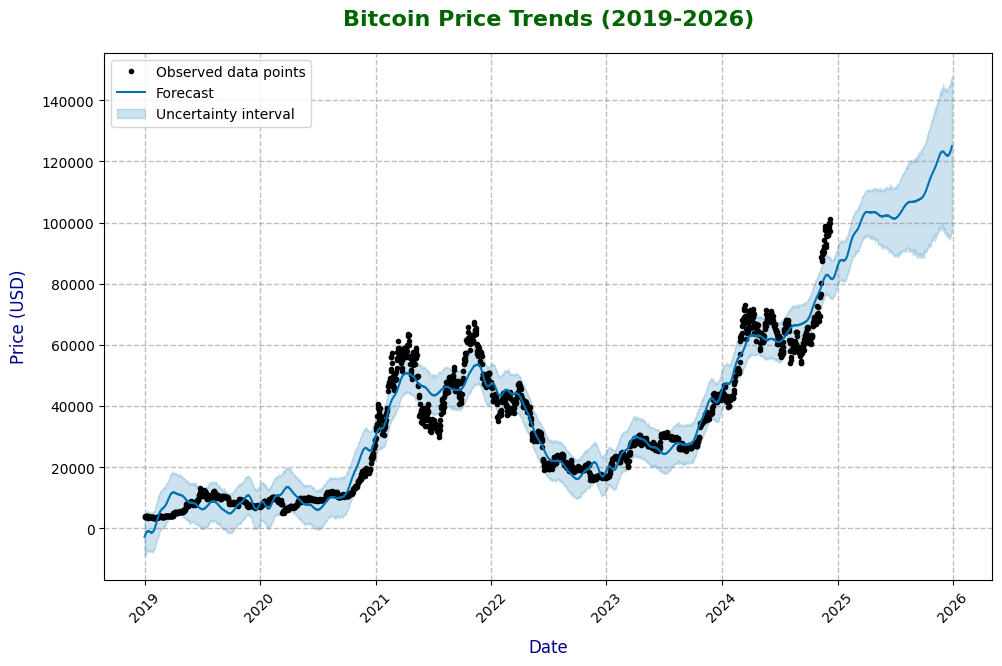

In [436]:
# From the forecast_bitcoin_trends DataFrame, plot the data to visualize
m.plot(forecast_bitcoin_trends);

plt.xlabel("Date", fontsize=12, labelpad=10, color='darkblue')  # Label font and spacing
plt.ylabel("Price (USD)", fontsize=12, labelpad=10, color='darkblue')  # Label font and spacing
plt.title("Bitcoin Price Trends (2019-2026)", fontsize=16, fontweight='bold', color='darkgreen', pad=20)  # Bold and larger title

# Formatting x-axis for better readability
plt.xticks(rotation=45, fontsize=10)  # Rotate x-ticks

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid with light styling
plt.legend(loc='upper left', fontsize=10)  # Add legend
plt.show()

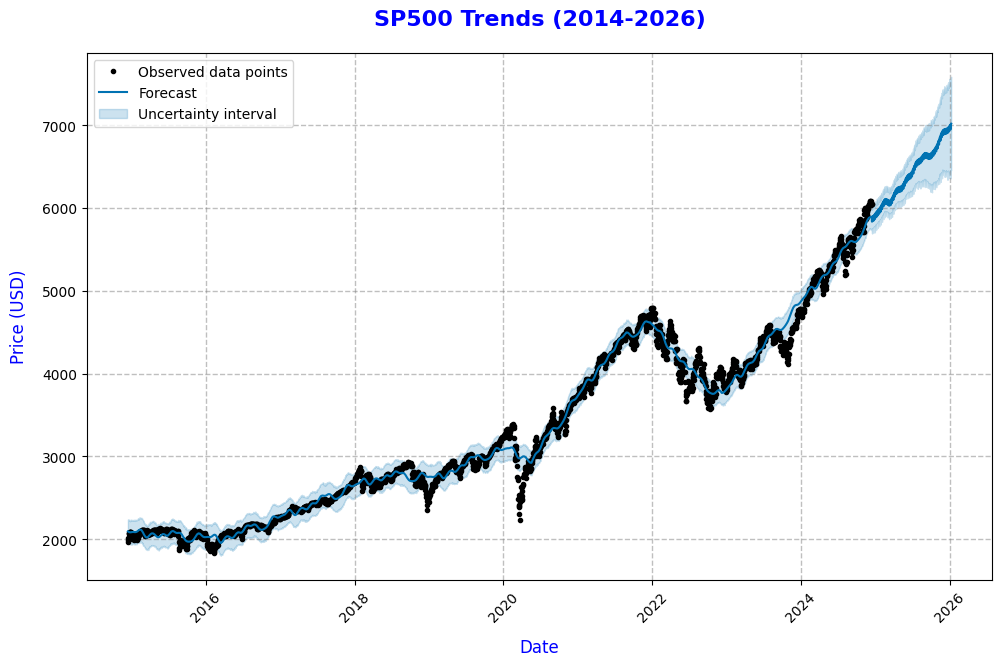

In [437]:
# From the forecast_sp500_trends DataFrame, plot the data to visualize
m1.plot(forecast_sp500_trends);
plt.xlabel("Date", fontsize=12, labelpad=10, color='blue')  # Label font and spacing
plt.ylabel("Price (USD)", fontsize=12, labelpad=10, color='blue')  # Label font and spacing
plt.title("SP500 Trends (2014-2026)", fontsize=16, fontweight='bold', color='Blue', pad=20)  # Bold and larger title

# Formatting x-axis for better readability
plt.xticks(rotation=45, fontsize=10)  # Rotate x-ticks

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid with light styling
plt.legend(loc='upper left', fontsize=10)  # Add legend
plt.show()



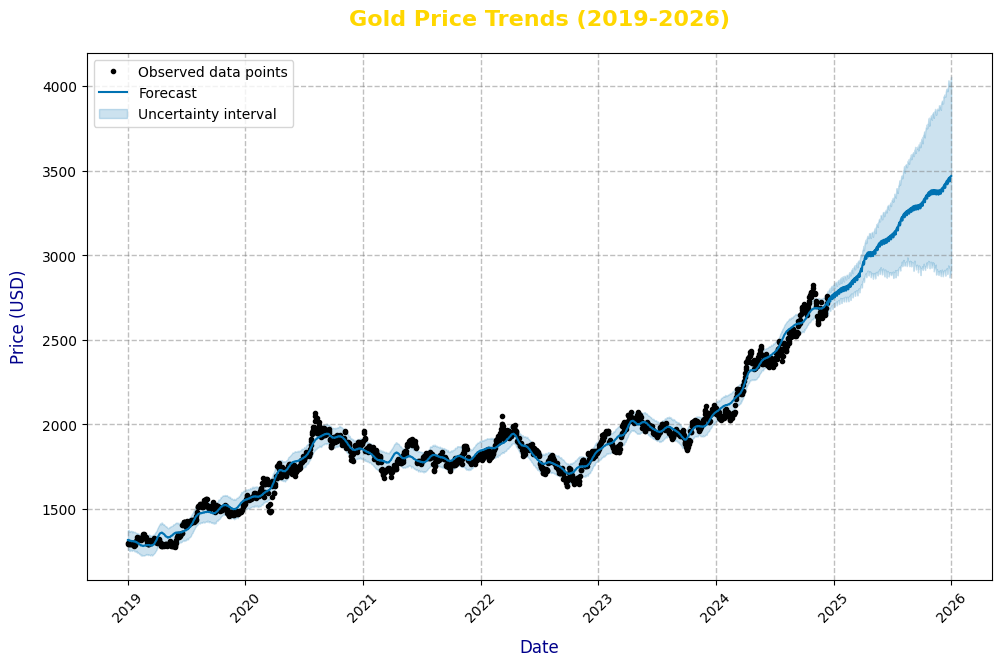

In [438]:
# From the forecast_gold_trends DataFrame, plot the data to visualize
m2.plot(forecast_gold_trends)

plt.xlabel("Date", fontsize=12, labelpad=10, color='darkblue')  # Label font and spacing
plt.ylabel("Price (USD)", fontsize=12, labelpad=10, color='darkblue')  # Label font and spacing
plt.title("Gold Price Trends (2019-2026)", fontsize=16, fontweight='bold', color='gold', pad=20)  # Bold and larger title

# Formatting x-axis for better readability
plt.xticks(rotation=45, fontsize=10)  # Rotate x-ticks

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid with light styling
plt.legend(loc='upper left', fontsize=10)  # Add legend

plt.show()

# **Add Stock Volatility to the analysis**

In [439]:
# For Bitcoin, Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
bitcoin_df['Stock Volatility'] = bitcoin_df['Price'].rolling(window=4).std()
bitcoin_df.head()

,Date,Price,Open,High,Low,Volume,Stock Volatility
0,2021-08-03,38130.3,39167.4,39766.6,37688.2,260.0,NaN
1,2020-12-25,24689.6,23728.7,24778.9,23445.3,2400.0,NaN
2,2021-08-16,45996.3,46991.6,48002.4,45672.1,2410.0,NaN
3,2021-03-04,48428.0,50388.0,51757.7,47521.8,9560.0,10692.556843
4,2023-08-12,29428.2,29420.8,29480.8,29375.4,11070.0,11836.908845


In [440]:
# Create a new Bitcoin Dataframe with an index of date to properly display in stock volatility
bitcoin_df_volatility = bitcoin_df

# Set the index to date
bitcoin_df_volatility = bitcoin_df_volatility.set_index('Date')

# Sort the values by Date and ascending in order
bitcoin_df_volatility = bitcoin_df_volatility.sort_values(by='Date', ascending=True)

bitcoin_df_volatility.head()

,Price,Open,High,Low,Volume,Stock Volatility
Date,,,,,,
2019-01-01,3809.4,3709.5,3814.3,3664.4,469110.0,7234.628001
2019-01-02,3873.8,3809.7,3894.8,3768.1,554470.0,4157.198375
2019-01-03,3780.1,3874.1,3875.8,3753.0,450320.0,7523.925269
2019-01-04,3802.7,3780.5,3823.9,3720.0,488700.0,2120.218408
2019-01-05,3785.4,3802.8,3846.7,3769.0,468450.0,5548.514732


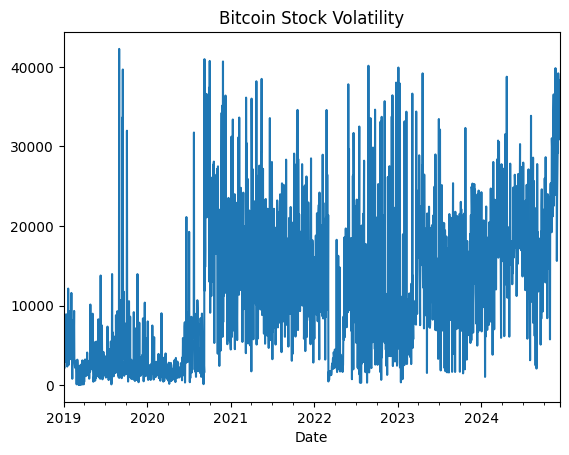

In [441]:
# Visualize the stock volatility
bitcoin_df_volatility['Stock Volatility'].plot(title="Bitcoin Stock Volatility");


In [442]:
# For SP500, Create a new column in the DataFrame called Stock Volatility for SP500
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
sp500_df['Stock Volatility'] = sp500_df['Price'].rolling(window=4).std()


In [443]:
# Create a new SP500 Dataframe with an index of date to properly display in stock volatility
sp500_df_volatility = sp500_df

# Set the index to date
sp500_df_volatility = sp500_df_volatility.set_index('Date')

# Sort the values by Date and ascending in order
sp500_df_volatility = sp500_df_volatility.sort_values(by='Date', ascending=True)

sp500_df_volatility.head()

,Price,Open,High,Low,Stock Volatility
Date,,,,,
2014-12-15,1989.63,2005.03,2018.69,1982.26,0.348365
2014-12-16,1972.74,1986.71,2016.89,1972.56,1.481902
2014-12-17,2012.89,1973.77,2016.75,1973.77,0.717281
2014-12-18,2061.23,2018.98,2061.23,2018.98,0.107819
2014-12-19,2070.65,2061.04,2077.85,2061.03,1.016346


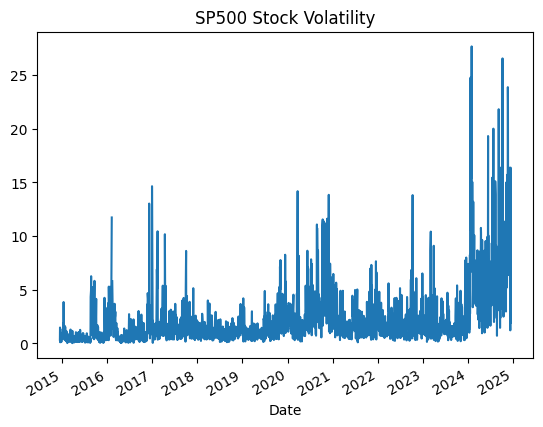

In [444]:
# Visualize the stock volatility for SP500
sp500_df_volatility['Stock Volatility'].plot(title="SP500 Stock Volatility");

In [445]:
# Create a new column in the gold DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
gold_df['Stock Volatility'] = gold_df['Price'].rolling(window=4).std()
gold_df.head()

,Date,Price,Open,High,Low,Change %,Stock Volatility
0,2024-12-12,2748.3,2753.51,2760.91,2743.49,-0.30%,NaN
1,2024-12-11,2756.7,2721.20,2759.70,2719.10,1.41%,NaN
2,2024-12-10,2718.4,2684.40,2721.70,2680.70,1.21%,NaN
3,2024-12-09,2685.8,2665.00,2700.00,2649.70,0.99%,32.180843
4,2024-12-06,2659.6,2655.00,2667.90,2635.60,0.42%,41.961043


In [446]:
# Create a new gold Dataframe with an index of date to properly display in stock volatility
gold_df_volatility = gold_df

# Set the index to date
gold_df_volatility = gold_df_volatility.set_index('Date')

# Sort the values by Date and ascending in order
gold_df_volatility = gold_df_volatility.sort_values(by='Date', ascending=True)

gold_df_volatility.head()

,Price,Open,High,Low,Change %,Stock Volatility
Date,,,,,,
2019-01-02,1290.5,1291.4,1297.0,1287.0,0.22%,4.777290
2019-01-03,1301.2,1293.5,1302.8,1292.8,0.83%,4.234383
2019-01-04,1292.2,1301.4,1306.5,1284.6,-0.69%,3.095561
2019-01-07,1296.4,1293.3,1303.2,1290.7,0.33%,2.680019
2019-01-08,1292.4,1296.4,1297.2,1286.7,-0.31%,2.643861


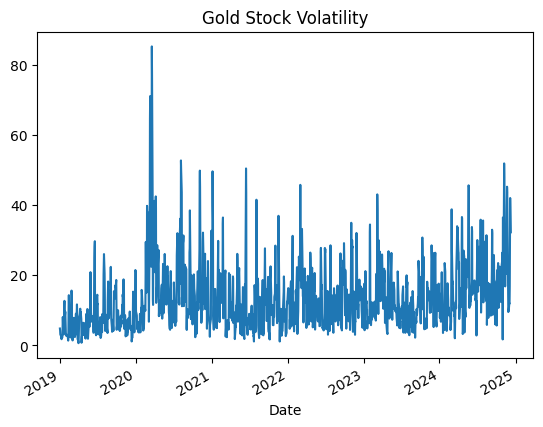

In [447]:
# Visualize the stock volatility
gold_df_volatility['Stock Volatility'].plot(title="Gold Stock Volatility");

## **Calculate which stock has the lowest volatility using Average True Range**

In [448]:
# Import hvplot
!pip install hvplot
import hvplot.pandas

# Activate Bokeh for interactive plots
hvplot.extension('bokeh')

In [449]:
# Add a new column for Average True Range (ATR) for Bitcoin data
bitcoin_df_volatility['High_Low'] = bitcoin_df_volatility['High'] - bitcoin_df_volatility['Low']
bitcoin_df_volatility['High_Close'] = abs(bitcoin_df_volatility['High'] - bitcoin_df_volatility['Price'].shift(1))
bitcoin_df_volatility['Low_Close'] = abs(bitcoin_df_volatility['Low'] - bitcoin_df_volatility['Price'].shift(1))
bitcoin_df_volatility['True_Range'] = bitcoin_df_volatility[['High_Low', 'High_Close', 'Low_Close']].max(axis=1)

bitcoin_df_volatility['ATR'] = bitcoin_df_volatility['True_Range'].rolling(window=45).mean().astype(float)

In [450]:
# Create an interactive line plot using data.hvplot.line(x='x', y='y', title="Interactive Line Plot", xlabel="X-axis", ylabel="Y-axis", line_width=2)
bitcoin_df_volatility.hvplot.line(x='Date', y='True_Range', title="Bitcoin Average True Range", xlabel="Year", ylabel=" Average True Range (ATR)", line_width=2)

:Curve   [Date]   (True_Range)

In [451]:
# Add a new column for Average True Range (ATR) for SP500 data

sp500_df_volatility['High_Low'] = sp500_df_volatility['High'] - sp500_df_volatility['Low']
sp500_df_volatility['High_Close'] = abs(sp500_df_volatility['High'] - sp500_df_volatility['Price'].shift(1))
sp500_df_volatility['Low_Close'] = abs(sp500_df_volatility['Low'] - sp500_df_volatility['Price'].shift(1))
sp500_df_volatility['True_Range'] = sp500_df_volatility[['High_Low', 'High_Close', 'Low_Close']].max(axis=1)

sp500_df_volatility['ATR'] = sp500_df_volatility['True_Range'].rolling(window=45).mean().astype(float)


In [452]:
# Create an interactive line plot using data.hvplot.line(x='x', y='y', title="Interactive Line Plot", xlabel="X-axis", ylabel="Y-axis", line_width=2)
sp500_df_volatility.hvplot.line(x='Date', y='True_Range', title="SP500 Average True Range", xlabel="Year", ylabel=" Average True Range (ATR)", line_width=2)

:Curve   [Date]   (True_Range)

In [453]:
# Add a new column for Average True Range (ATR) for Gold data
gold_df_volatility['High_Low'] = gold_df_volatility['High'] - gold_df_volatility['Low']
gold_df_volatility['High_Close'] = abs(gold_df_volatility['High'] - gold_df_volatility['Price'].shift(1))
gold_df_volatility['Low_Close'] = abs(gold_df_volatility['Low'] - gold_df_volatility['Price'].shift(1))
gold_df_volatility['True_Range'] = gold_df_volatility[['High_Low', 'High_Close', 'Low_Close']].max(axis=1)

gold_df_volatility['ATR'] = gold_df_volatility['True_Range'].rolling(window=45).mean().astype(float)

In [454]:
# Create an interactive line plot using data.hvplot.line(x='x', y='y', title="Interactive Line Plot", xlabel="X-axis", ylabel="Y-axis", line_width=2)
gold_df_volatility.hvplot.line(x='Date', y='True_Range', title="Gold Average True Range", xlabel="Year", ylabel=" Average True Range (ATR)", line_width=2)

:Curve   [Date]   (True_Range)

# **Calculate the beta values**

Using SP500 as the benchmark, quantify the beta values for bitcoin and gold respectively. This will give our client a quantifiable value for what is the riskiest stock versus only looking on stock volatility.

In [483]:
# Import dependencies
import pandas as pd
import numpy as np

In [484]:
# Sort Bitcoin data on date column
bitcoin_df = bitcoin_df.sort_values(by='Date', ascending=True)
bitcoin_df.head()

,Date,Price,Open,High,Low,Volume,Stock Volatility
1574,2019-01-01,3809.4,3709.5,3814.3,3664.4,469110.0,7234.628001
1673,2019-01-02,3873.8,3809.7,3894.8,3768.1,554470.0,4157.198375
1548,2019-01-03,3780.1,3874.1,3875.8,3753.0,450320.0,7523.925269
1594,2019-01-04,3802.7,3780.5,3823.9,3720.0,488700.0,2120.218408
1570,2019-01-05,3785.4,3802.8,3846.7,3769.0,468450.0,5548.514732


In [485]:
# Sort SP500 data on date column
sp500_df = sp500_df.sort_values(by='Date', ascending=True)

# Use .loc function to filter to only dates after 1-1-2019
sp500_df = sp500_df.loc[sp500_df['Date'] >= "2018-12-31"]

sp500_df.head()

,Date,Price,Open,High,Low,Stock Volatility
727,2018-12-31,2506.85,2498.94,2509.24,2482.82,2.244124
731,2019-01-02,2510.03,2476.96,2519.49,2467.47,1.433350
676,2019-01-03,2447.89,2491.92,2493.14,2443.96,0.735816
737,2019-01-04,2531.94,2474.33,2538.07,2474.33,2.063450
745,2019-01-07,2549.69,2535.61,2566.16,2524.56,2.005044


In [486]:
# Sort Gold data on date column
gold_df = gold_df.sort_values(by='Date', ascending=True)
gold_df.head()

,Date,Price,Open,High,Low,Change %,Stock Volatility
1532,2019-01-02,1290.5,1291.4,1297.0,1287.0,0.22%,4.777290
1531,2019-01-03,1301.2,1293.5,1302.8,1292.8,0.83%,4.234383
1530,2019-01-04,1292.2,1301.4,1306.5,1284.6,-0.69%,3.095561
1529,2019-01-07,1296.4,1293.3,1303.2,1290.7,0.33%,2.680019
1528,2019-01-08,1292.4,1296.4,1297.2,1286.7,-0.31%,2.643861


In [487]:
# Create new dataframe to merge bitcoin_df and sp500_df on date
merged_df = pd.merge(bitcoin_df, sp500_df, on ="Date", how = "inner")
merged_df.head()

,Date,Price_x,Open_x,High_x,Low_x,Volume,Stock Volatility_x,Price_y,Open_y,High_y,Low_y,Stock Volatility_y
0,2019-01-02,3873.8,3809.7,3894.8,3768.1,554470.0,4157.198375,2510.03,2476.96,2519.49,2467.47,1.433350
1,2019-01-03,3780.1,3874.1,3875.8,3753.0,450320.0,7523.925269,2447.89,2491.92,2493.14,2443.96,0.735816
2,2019-01-04,3802.7,3780.5,3823.9,3720.0,488700.0,2120.218408,2531.94,2474.33,2538.07,2474.33,2.063450
3,2019-01-07,3985.9,4004.3,4028.0,3945.5,500880.0,7413.239002,2549.69,2535.61,2566.16,2524.56,2.005044
4,2019-01-08,3971.0,3985.8,4070.5,3943.1,514080.0,3101.844276,2574.41,2568.11,2579.82,2547.56,4.201534


In [488]:
# Create a new Merged_df with only the Price_X and Price_Y columns
beta_df = merged_df[["Date", "Price_x", "Price_y"]]
beta_df.head()

# Rename Columns from Price_x to Bitcoin_Close and Price_y to SP500_Close
beta_df = beta_df.rename(columns={"Price_x": "Bitcoin_Close", "Price_y": "SP500_Close"})
beta_df.head()

,Date,Bitcoin_Close,SP500_Close
0,2019-01-02,3873.8,2510.03
1,2019-01-03,3780.1,2447.89
2,2019-01-04,3802.7,2531.94
3,2019-01-07,3985.9,2549.69
4,2019-01-08,3971.0,2574.41


In [489]:
# Calculate daily returns (percentage change) by adding a new column named Bitcoin_Returns based on the Bitcoin_Close Column
beta_df['Bitcoin_Returns'] = beta_df['Bitcoin_Close'].pct_change()

# Calculate daily returns (percentage change) by adding a new column named SP500_Returns based on the SP500_Close Column
beta_df['SP500_Returns'] = beta_df['SP500_Close'].pct_change()
beta_df.head()

,Date,Bitcoin_Close,SP500_Close,Bitcoin_Returns,SP500_Returns
0,2019-01-02,3873.8,2510.03,NaN,NaN
1,2019-01-03,3780.1,2447.89,-0.024188,-0.024757
2,2019-01-04,3802.7,2531.94,0.005979,0.034336
3,2019-01-07,3985.9,2549.69,0.048176,0.007010
4,2019-01-08,3971.0,2574.41,-0.003738,0.009695


In [490]:
# Drop NaN values (due to pct_change)
beta_df = beta_df.dropna()

In [492]:
# Calculate covariance between Bitcoin and S&P 500 returns
covariance = np.cov(beta_df['Bitcoin_Returns'],beta_df['SP500_Returns'])[0][1]
covariance

0.00016588244390220645

In [493]:
# Calculate variance of S&P 500 returns
""""Source Code: ChatGPT assistance"""
variance_sp500 = np.var(beta_df['SP500_Returns'])
variance_sp500

0.000161291196160597

In [494]:
# Calculate Beta for Bitcoin compared to the SP500 (the benchmark)
""""Source Code: ChatGPT assistance"""
beta = covariance / variance_sp500
print("Beta of Bitcoin with respect to S&P 500:", beta)
print("If Beta is greater than 1, the stock is more volatile than the market. Since the Beta for Bitcoin is", beta, "it is more volatile than the market.")

Beta of Bitcoin with respect to S&P 500: 1.0284655818228168
If Beta is greater than 1, the stock is more volatile than the market. Since the Beta for Bitcoin is 1.0284655818228168 it is more volatile than the market.


In [477]:
# Create new dataframe to merge gold_df and sp500_df on date
gold_merged_df = pd.merge(gold_df, sp500_df, on ="Date", how = "inner")
gold_merged_df.head()

# Save gold_merged_df with only the Price_X and Price_Y columns
gold_merged_df = gold_merged_df[["Date", "Price_x", "Price_y"]]

# Rename Columns from Price_x to Gold_Close and Price_y to SP500_Close
gold_merged_df = gold_merged_df.rename(columns={"Price_x": "Gold_Close", "Price_y": "SP500_Close"})
gold_merged_df.head()


,Date,Gold_Close,SP500_Close
0,2019-01-02,1290.5,2510.03
1,2019-01-03,1301.2,2447.89
2,2019-01-04,1292.2,2531.94
3,2019-01-07,1296.4,2549.69
4,2019-01-08,1292.4,2574.41


In [478]:
# Calculate daily returns (percentage change) by adding a new column named Gold_Returns based on the Gold_Close Column
gold_merged_df['Gold_Returns'] = gold_merged_df['Gold_Close'].pct_change()

# Calculate daily returns (percentage change) by adding a new column named SP500_Returns based on the SP500_Close Column
gold_merged_df['SP500_Returns'] = gold_merged_df['SP500_Close'].pct_change()
gold_merged_df.head()

,Date,Gold_Close,SP500_Close,Gold_Returns,SP500_Returns
0,2019-01-02,1290.5,2510.03,NaN,NaN
1,2019-01-03,1301.2,2447.89,0.008291,-0.024757
2,2019-01-04,1292.2,2531.94,-0.006917,0.034336
3,2019-01-07,1296.4,2549.69,0.003250,0.007010
4,2019-01-08,1292.4,2574.41,-0.003085,0.009695


In [479]:
# Drop NaN values (due to pct_change)
gold_merged_df = gold_merged_df.dropna()
gold_merged_df.head()

,Date,Gold_Close,SP500_Close,Gold_Returns,SP500_Returns
1,2019-01-03,1301.2,2447.89,0.008291,-0.024757
2,2019-01-04,1292.2,2531.94,-0.006917,0.034336
3,2019-01-07,1296.4,2549.69,0.003250,0.007010
4,2019-01-08,1292.4,2574.41,-0.003085,0.009695
5,2019-01-09,1298.5,2584.96,0.004720,0.004098


In [480]:
# Calculate covariance between Gold and S&P 500 returns
covariance_gold = np.cov(gold_merged_df['Gold_Returns'],gold_merged_df['SP500_Returns'])[0][1]
covariance_gold

1.1647482327016686e-05

In [481]:
# Calculate variance of S&P 500 returns
""""Source Code: ChatGPT assistance"""
new_variance_sp500 = np.var(gold_merged_df['SP500_Returns'])
new_variance_sp500

0.00016103904718093372

In [496]:
# Calculate Beta for Gold compared to the SP500 (the benchmark)
""""Source Code: ChatGPT assistance"""
final_beta = covariance_gold / new_variance_sp500
print("Beta of Gold with respect to S&P 500:", final_beta)
print("If Beta is less than 1, the stock is less volatile than the market. Since the Beta for Gold is", final_beta, "it is less volatile than the market.")

Beta of Gold with respect to S&P 500: 0.07232706930965804
If Beta is less than 1, the stock is less volatile than the market. Since the Beta for Gold is 0.07232706930965804 it is less volatile than the market.
